In [2]:
import sys
print(sys.version)
from qiskit import IBMQ

IBMQ.load_account() # Load account from disk
providers = IBMQ.providers()   # List all available providers
for provider in providers:
    print(f'===provider=== {provider}')

provider = IBMQ.get_provider(hub='ibm-q')
backends = provider.backends()
for backend in backends:
    print(f'===backend=== {backend}')
    
backend = provider.get_backend('ibmq_16_melbourne')

3.6.6 (v3.6.6:4cf1f54eb7, Jun 27 2018, 03:37:03) [MSC v.1900 64 bit (AMD64)]
===provider=== <AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>
===backend=== ibmq_qasm_simulator
===backend=== ibmqx2
===backend=== ibmq_16_melbourne
===backend=== ibmq_vigo
===backend=== ibmq_ourense
===backend=== ibmq_london
===backend=== ibmq_burlington
===backend=== ibmq_essex


In [3]:
from qiskit import *
from qiskit.compiler import transpile, assemble

In [4]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

In [5]:
job = execute(circuit, backend)

In [11]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

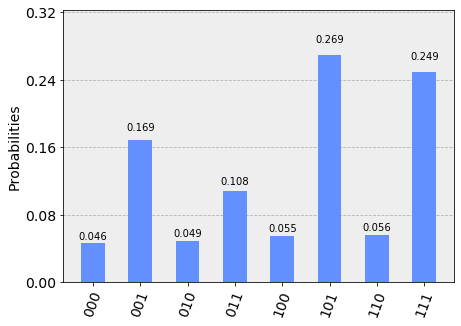

In [12]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])